In [ ]:
import os
import  joblib

import  pandas                  as      pd
import  numpy                   as      np
import  seaborn                 as      sns
import  matplotlib              as      mpl
import  matplotlib.pyplot       as      plt

from    warnings                import  simplefilter

from    sklearn.svm             import  SVC
from    sklearn.tree            import  DecisionTreeClassifier, plot_tree
from    sklearn.metrics         import  accuracy_score, classification_report, confusion_matrix
from    sklearn.ensemble        import  RandomForestClassifier
from    sklearn.neighbors       import  KNeighborsClassifier
from    sklearn.linear_model    import  LogisticRegression
from    sklearn.preprocessing   import  OneHotEncoder
from    sklearn.model_selection import  GridSearchCV, train_test_split

# Set high-resolution matplotlib plots
mpl.rcParams['figure.dpi'] = 300

# Set the random seed for reproducibility
np.random.seed(42)

# Disable scikit warnings
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

### **Data Pre-Processing**

In [275]:
# Load dataset file
dataset = pd.read_csv(r"./Dataset/dataset.csv")

In [276]:
def clean_data(x):                                                                            #we define a "cleaning" function which removes any spaces in front or after the string
    if isinstance(x, str):                                                                    #Check if (object,type)
        return x.strip().replace("  ", " ").replace(" _", "_").replace("_ ", "_")             #eemove spaces from both ends of the string
    else:
        return x  

# Apply the function to each column
for col in dataset.columns:
    dataset[col] = dataset[col].map(clean_data)

# List of all symptom columns
symptom_cols = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]
# Create the empty list to store all symptoms
all_symptoms = []

for col in symptom_cols:                           # go through each Symptom_1 to Symptom_17 column
    for symptom in dataset[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms.append(symptom)           # add it to the list

unique_symptoms = sorted(list(set(all_symptoms)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier

# Create a list of all diseases
disease_list = dataset['Disease'].unique()      #we use the unique function to get all diseases

# Print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms))
print("Symptoms:", unique_symptoms)

print("Number of unique diseases:", len(disease_list))
print("Symptoms:", disease_list)

Number of unique symptoms: 131
Symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', '

In [277]:
binary = pd.DataFrame()                  #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

# For each syptom we check each row (one-hot encoding)
for symptom in unique_symptoms:
    binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
# For each symptom in list, check every patient.
# and set 1 if the patient has this symptom anywhere, or 0 if not

# Prepare the data
X_binary = binary.drop(columns=['Disease'])     # All columns except Disease
y_binary = binary['Disease']                    # Target column

# Split the data into training and testing sets (70% train, 30% test)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, train_size = 0.7, test_size=0.3, random_state=42)

### **Decision Tree**

In [278]:
# Define parameters for the Decision Tree model
param_grid = {'ccp_alpha': [0.1, .01, .001, .0001],
              'max_depth' : range(15,25,1),
              'criterion' :['gini', 'entropy','log_loss'],
             }

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=True)
# Fit the model to the training data
grid_search.fit(X_train_bin, y_train_bin)

# Get the best model from grid search
final_model = grid_search.best_estimator_

# Save the model
joblib.dump(final_model, './Models_Fulldata/decision_tree_model.pkl')
# Print the best parameters
print(final_model)

# Train the final model on the training data
final_model.fit(X_train_bin, y_train_bin)

# Prediction on the test set
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
DecisionTreeClassifier(ccp_alpha=0.0001, criterion='entropy', max_depth=24,
                       random_state=42)
                                        precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        32
                                  AIDS       1.00      1.00      1.00        39
                                  Acne       1.00      1.00      1.00        41
                   Alcoholic hepatitis       1.00      1.00      1.00        36
                               Allergy       1.00      1.00      1.00        35
                             Arthritis       1.00      1.00      1.00        36
                      Bronchial Asthma       1.00      1.00      1.00        44
                  Cervical spondylosis       1.00      1.00      1.00        32
                           Chicken pox       1.00      1.00      1.00        35
                   C

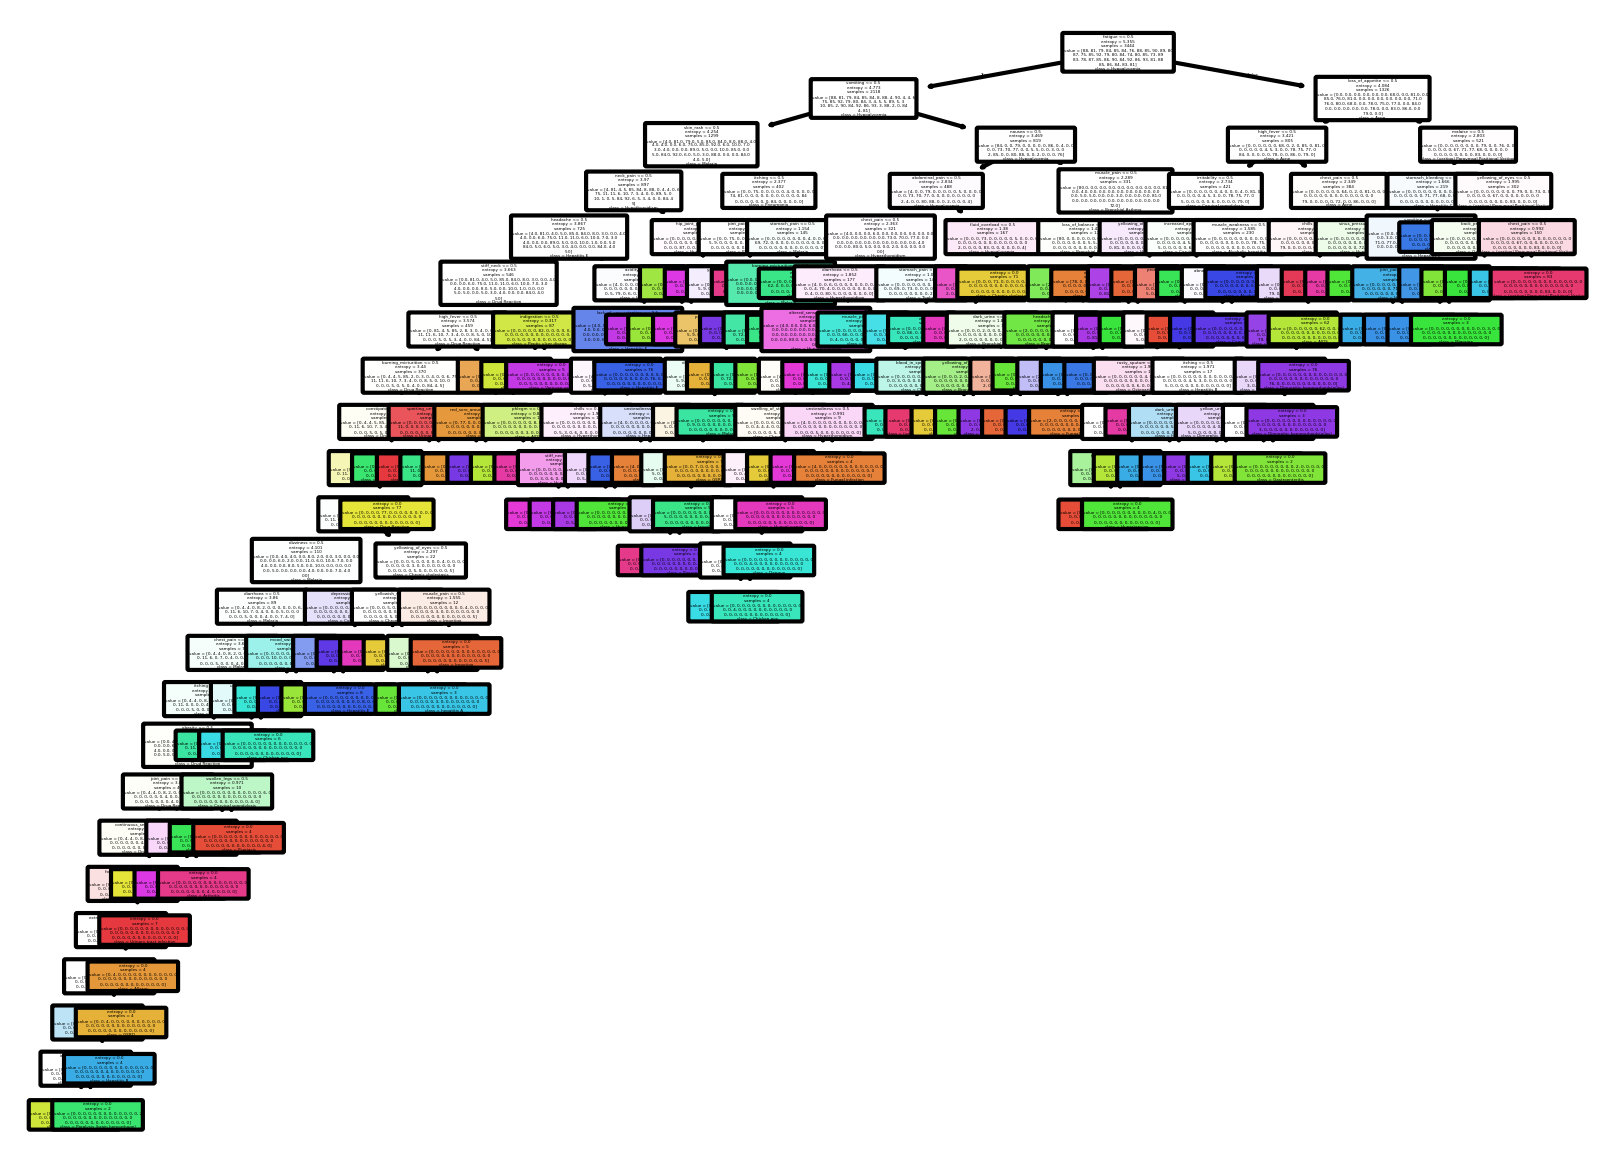

In [279]:
# Plot tree graph
plot_tree(final_model, filled=True, feature_names=X_binary.columns, class_names=y_binary.unique(), rounded=True)
# Show the plot
plt.show()
# plt.savefig("./Plots/Classifier_Fulldata/decision_tree.pdf")

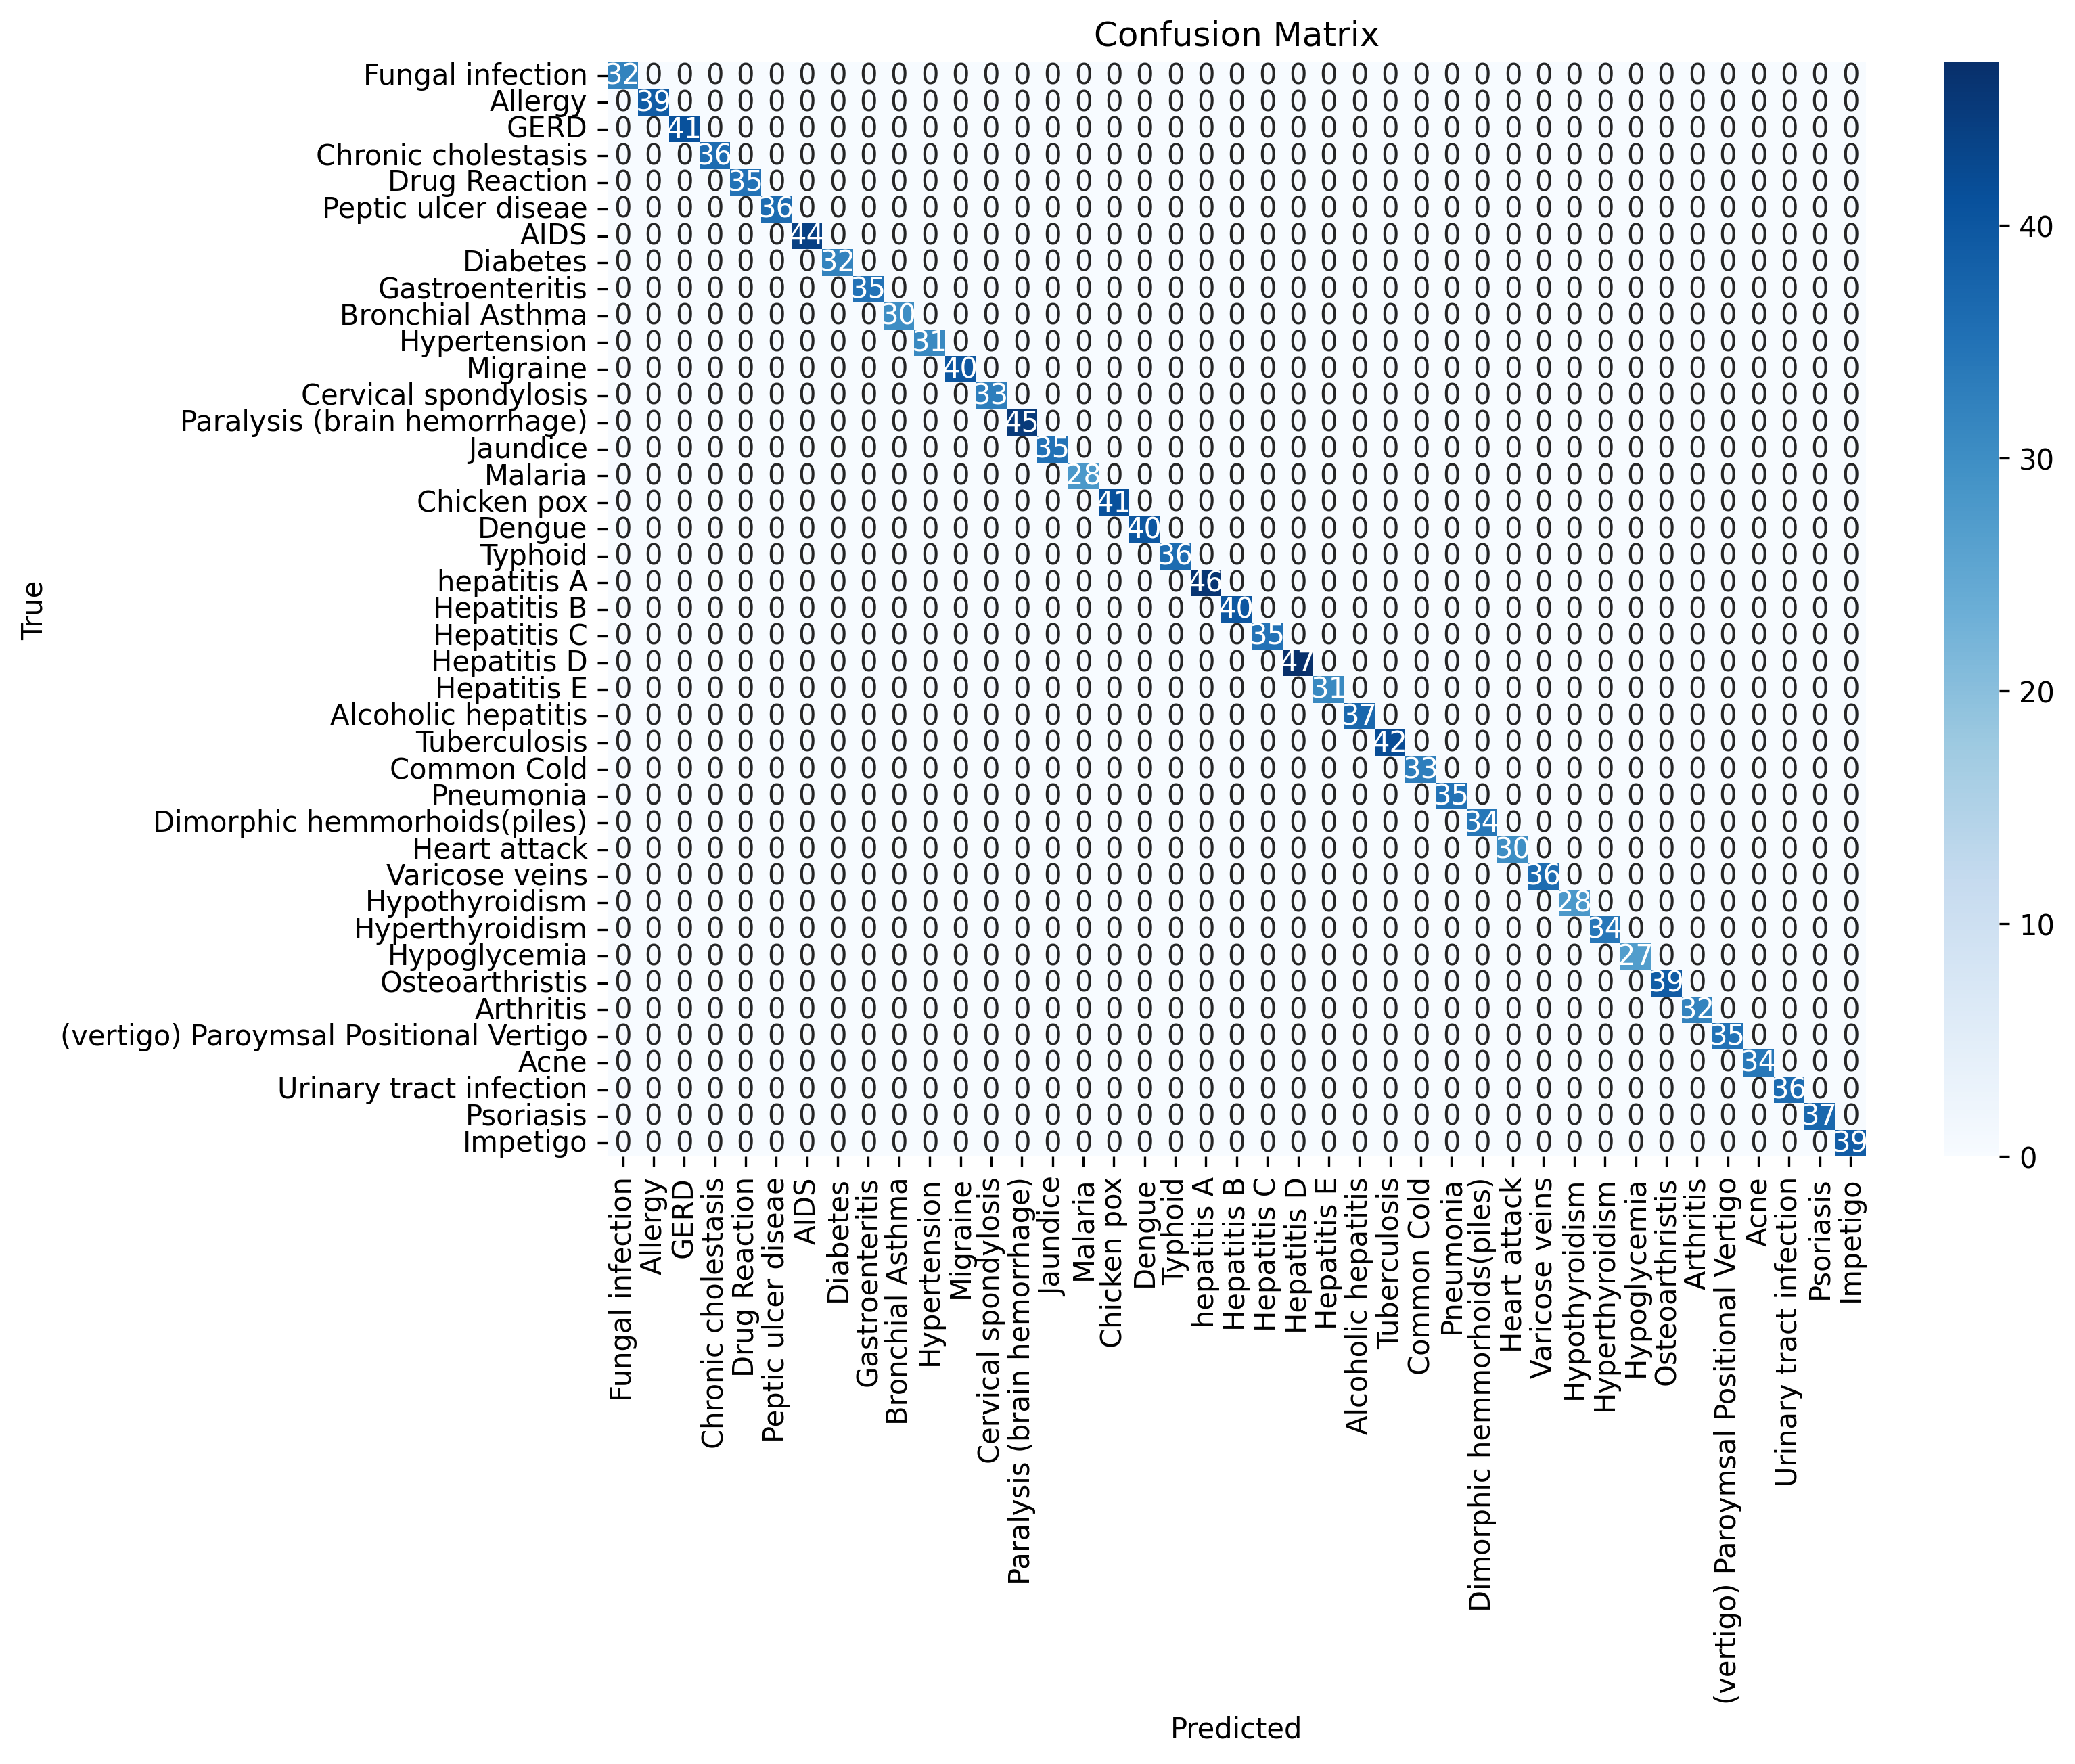

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test_bin, predictions)
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_binary.unique(), yticklabels=y_binary.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Random Forest**

In [ ]:
param_grid = {'n_estimators': range(40, 46, 1),
              'max_depth' : range(12,15,1),
              'criterion' :['gini', 'entropy','log_loss'],
             }

model = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=True)
grid_search.fit(X_train_bin, y_train_bin)

final_model = grid_search.best_estimator_
joblib.dump(final_model, './Models_Fulldata/random_forest_model.pkl')
print(final_model)

# Train
final_model.fit(X_train_bin, y_train_bin)

# Prediction
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
RandomForestClassifier(max_depth=14, n_estimators=40, random_state=42)
                                        precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        32
                                  AIDS       1.00      1.00      1.00        39
                                  Acne       1.00      1.00      1.00        41
                   Alcoholic hepatitis       1.00      1.00      1.00        36
                               Allergy       1.00      1.00      1.00        35
                             Arthritis       1.00      1.00      1.00        36
                      Bronchial Asthma       1.00      1.00      1.00        44
                  Cervical spondylosis       1.00      1.00      1.00        32
                           Chicken pox       1.00      1.00      1.00        35
                   Chronic cholestasis       1.00      1.00      1

### **Logistic Regression**

In [ ]:
# Define parameters for the SVM model
param_grid = {'tol' : [.001,0.02,.005,.01,.02],
              'C' : [0.1, 0.5, 1, 2, 5],
              'solver' :['lbfgs', 'newton-cg', 'sag', 'saga'],
             }

# Create a logistic regression model
model = LogisticRegression(random_state = 42)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = True)
# Fit the model to the training data
grid_search.fit(X_train_bin, y_train_bin)

# Get the best model from grid search
final_model = grid_search.best_estimator_
#  Save the model
joblib.dump(final_model, './Models_Fulldata/logistic_regression_model.pkl')
# Print the best parameters
print(final_model)

# Train the final model on the training data
final_model.fit(X_train_bin, y_train_bin)

# Prediction on the test set
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
LogisticRegression(C=0.1, random_state=42, tol=0.001)
                                        precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        32
                                  AIDS       1.00      1.00      1.00        39
                                  Acne       1.00      1.00      1.00        41
                   Alcoholic hepatitis       1.00      1.00      1.00        36
                               Allergy       1.00      1.00      1.00        35
                             Arthritis       1.00      1.00      1.00        36
                      Bronchial Asthma       1.00      1.00      1.00        44
                  Cervical spondylosis       1.00      1.00      1.00        32
                           Chicken pox       1.00      1.00      1.00        35
                   Chronic cholestasis       1.00      1.00      1.00        30
  

### **Support Vector Classifier**

In [ ]:
# Define parameters for the Decision Tree model
param_grid = {'C' : [.01,.02,.05,0.1, .2],
              'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree' : [1,2,3,4],
             }

# Create a logistic regression model
model = SVC(random_state = 42)
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = True)
# Fit the model to the training data
grid_search.fit(X_train_bin, y_train_bin)

# Get the best model from grid search
final_model = grid_search.best_estimator_
# Save model
joblib.dump(final_model, './Models_Fulldata/support_vector_model.pkl')
# Print the best parameters
print(final_model)

# Train the final model on the training data
final_model.fit(X_train_bin, y_train_bin)
# Prediction on the test set
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
SVC(C=0.01, degree=1, kernel='linear', random_state=42)
                                        precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        32
                                  AIDS       1.00      1.00      1.00        39
                                  Acne       1.00      1.00      1.00        41
                   Alcoholic hepatitis       1.00      1.00      1.00        36
                               Allergy       1.00      1.00      1.00        35
                             Arthritis       1.00      1.00      1.00        36
                      Bronchial Asthma       1.00      1.00      1.00        44
                  Cervical spondylosis       1.00      1.00      1.00        32
                           Chicken pox       1.00      1.00      1.00        35
                   Chronic cholestasis       1.00      1.00      1.00        30
 

### **K-Nearest Neighbors**

In [ ]:
# Define parameters for the KNN model
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
}

# Create a K-nearest neighbors model
model = KNeighborsClassifier()

# Create a grid search object
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose = True)
# Perform grid search using the training data
grid_search.fit(X_train_bin, y_train_bin)
# Get the best model from grid search
final_model = grid_search.best_estimator_

# Save model
joblib.dump(final_model, './Models_Fulldata/k_nearest_neighbors_model.pkl')
# Print the best model
print(final_model)

# Train the best model
final_model.fit(X_train_bin, y_train_bin)
# Evaluate the best model
predictions = final_model.predict(X_test_bin)

# Evaluation
print(classification_report(y_test_bin, predictions))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
KNeighborsClassifier(leaf_size=20, n_neighbors=3)
                                        precision    recall  f1-score   support

(vertigo) Paroymsal Positional Vertigo       1.00      1.00      1.00        32
                                  AIDS       1.00      1.00      1.00        39
                                  Acne       1.00      1.00      1.00        41
                   Alcoholic hepatitis       1.00      1.00      1.00        36
                               Allergy       1.00      1.00      1.00        35
                             Arthritis       1.00      1.00      1.00        36
                      Bronchial Asthma       1.00      1.00      1.00        44
                  Cervical spondylosis       1.00      1.00      1.00        32
                           Chicken pox       1.00      1.00      1.00        35
                   Chronic cholestasis       1.00      1.00      1.00        30
      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### **Neural Network**

### **Model Accuracy on Corrupted Data**

In [ ]:
# Get all scikit-learn models in the Models_Fulldata directory

# Create a list to hold the models
models = []

for model_name in os.listdir('./Models_Fulldata'):
    # Check if the file is a .pkl file
    if model_name.endswith('.pkl'):
        # Load the model using joblib
        model = joblib.load('./Models_Fulldata/' + model_name)
        # Append the model to the list
        models.append(model)

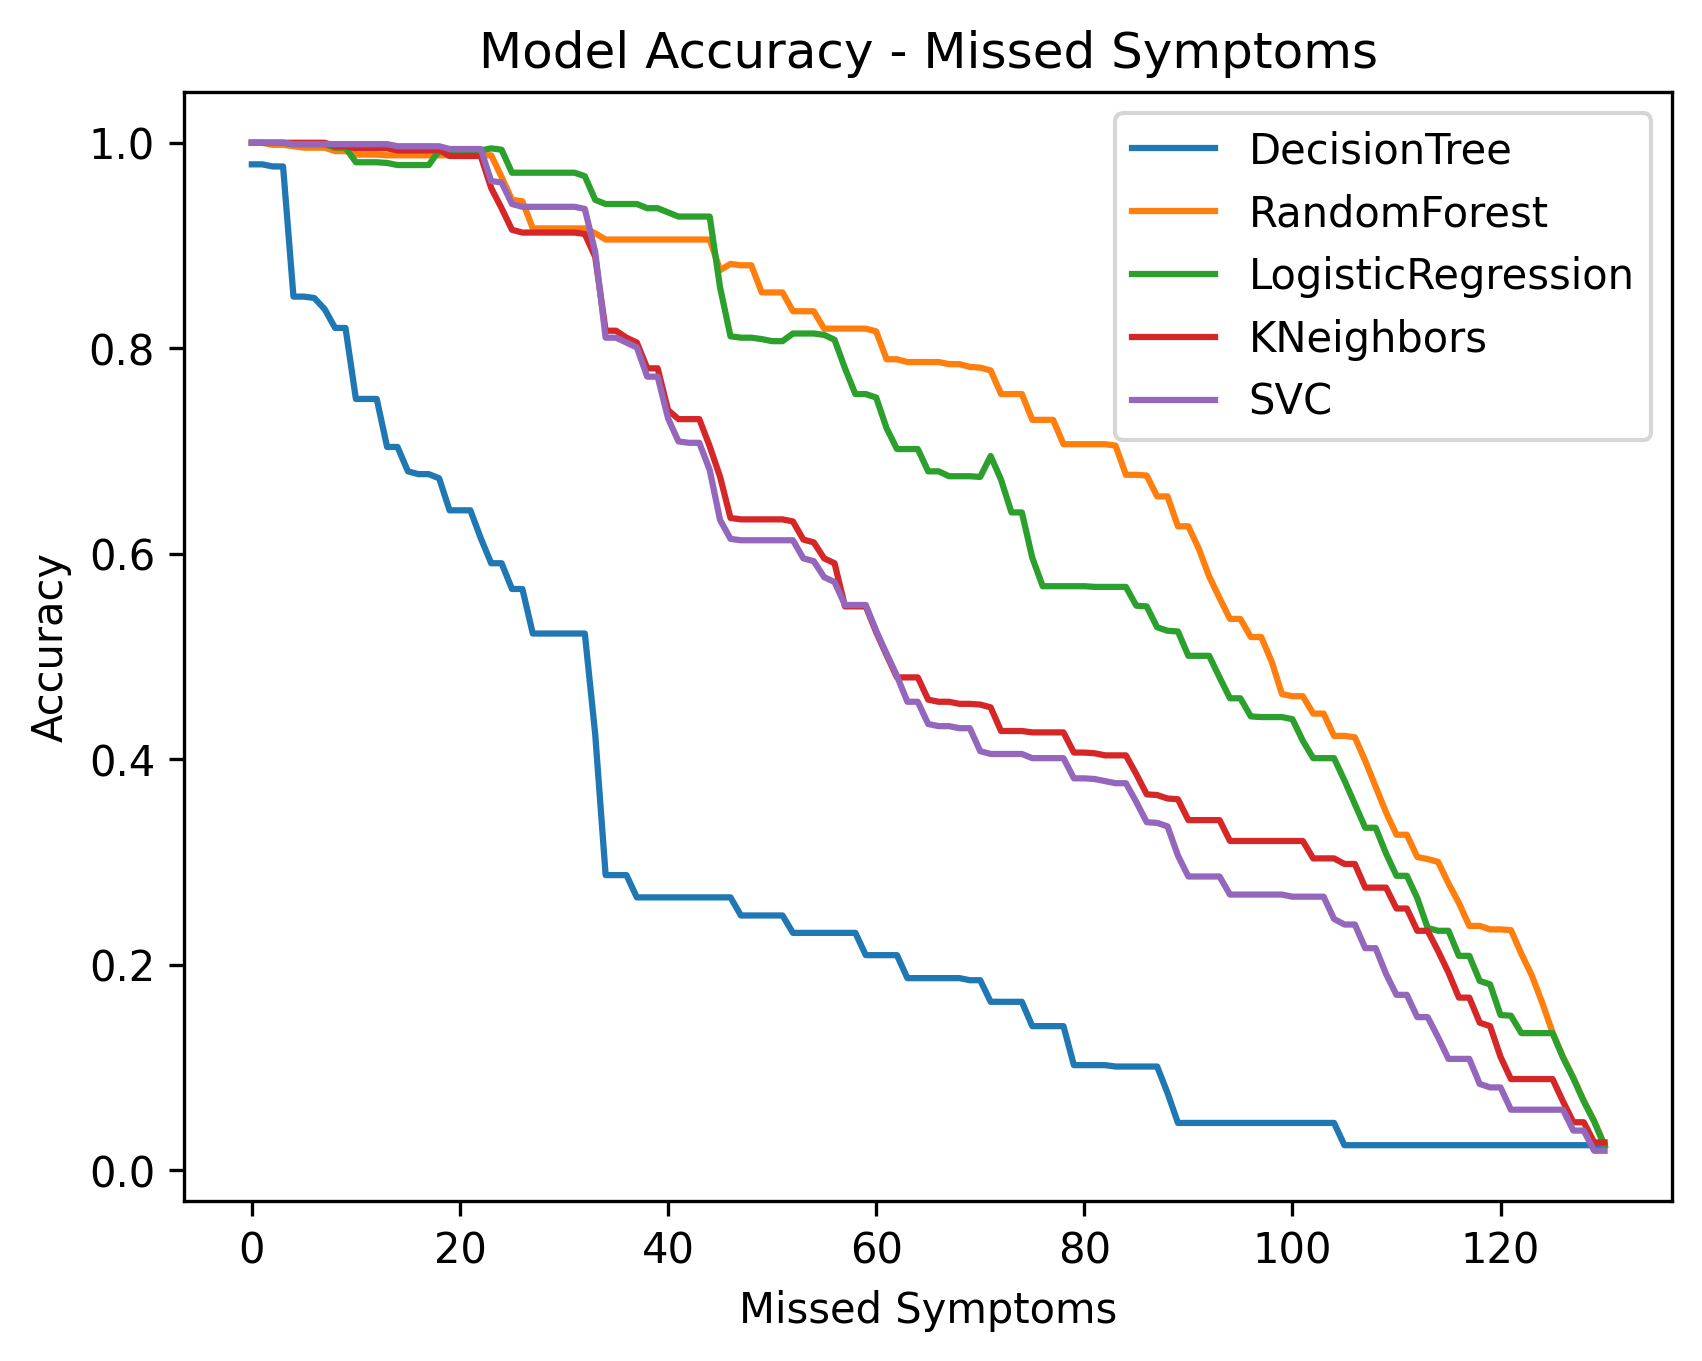

In [ ]:
# Redefine binary dataframes
X_sub = binary.drop(columns=['Disease'])
y_sub = binary['Disease']

# Split the data into training and testing sets (70% train, 30% test)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size = 0.3, random_state = 42)

# Define array for accuracies
accs = np.empty((len(models), len(unique_symptoms)))

# Iterate over each unique symptom
for i in range(len(unique_symptoms)):

    # Get indices where the symptom is present
    index, columns = np.where(X_test_sub == 1)
    # Choose a random symptom index from the columns where the value is 1
    random_symptom_index = np.random.choice(columns)
    # Set the random symptom to 0 (not present)
    X_test_sub.iloc[:, random_symptom_index] = 0 

    for j in range(len(models)):

        # Predict using the model
        predictions = models[j].predict(X_test_sub)
        # Evaluate the model
        accuracy = accuracy_score(y_test_sub, predictions)
        # Save the accuracy in the array
        accs[j, i] = accuracy

# Plot the accuracies
for k, model in enumerate(models):
    # Plot the accuracies for each model
    plt.plot(accs[k, :], label=model.__class__.__name__.split('Classifier')[0])

# Setup plots
plt.title('Model Accuracy - Missed Symptoms')
plt.xlabel('Missed Symptoms')
plt.ylabel('Accuracy')
plt.legend()
# Save figure
plt.savefig('./Plots/Classifier_Fulldata/accuracy_missed.pdf')
# Show plot
plt.show()

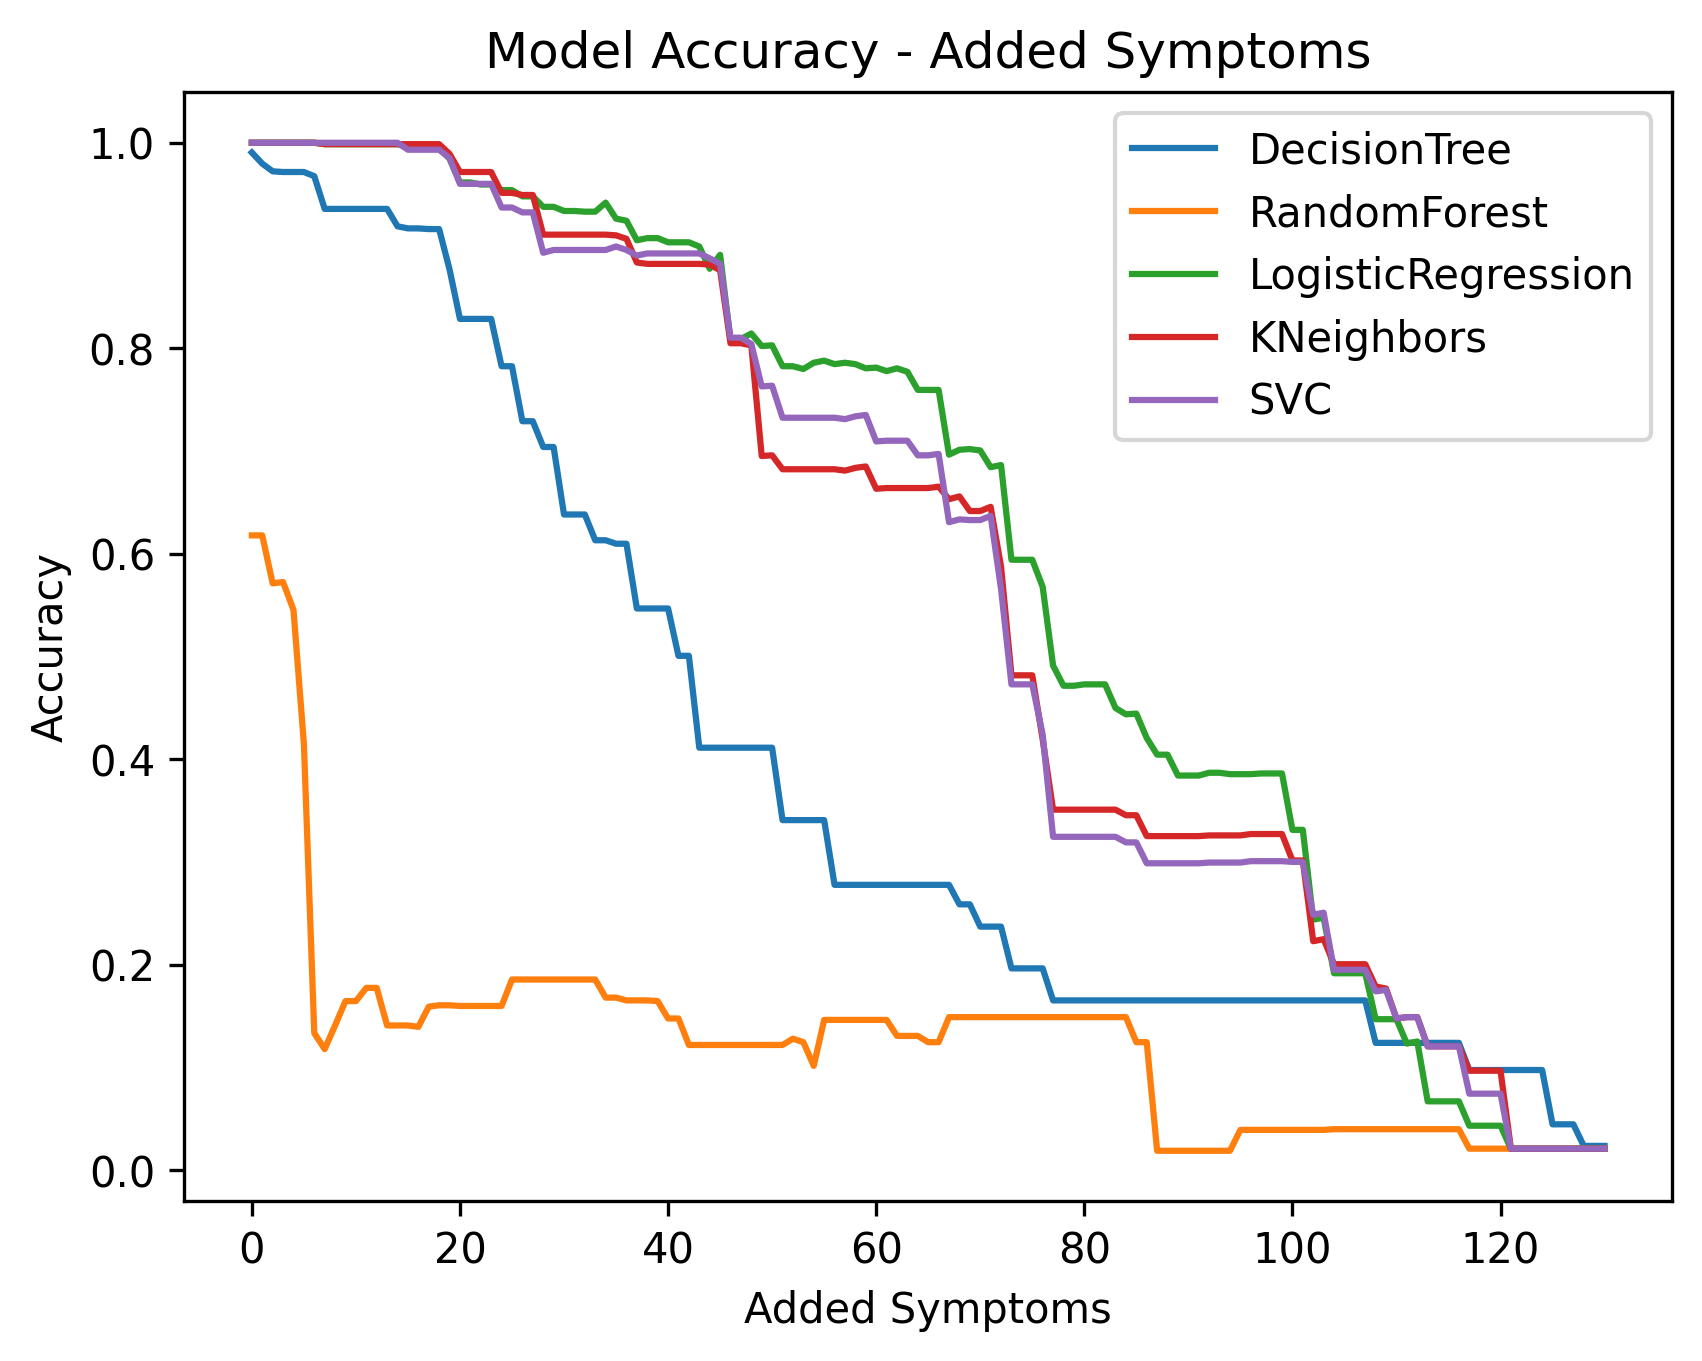

In [ ]:
# Redefine binary dataframes
X_sub = binary.drop(columns=['Disease'])
y_sub = binary['Disease']

# Split the data into training and testing sets (70% train, 30% test)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size = 0.3, random_state = 42)

# Define array for accuracies
accs = np.empty((len(models), len(unique_symptoms)))

# Iterate over each unique symptom
for i in range(len(unique_symptoms)):

    # Get indices where the symptom is not present
    index, columns = np.where(X_test_sub == 0)
    # Choose a random symptom index from the columns where the value is 1
    random_symptom_index = np.random.choice(columns)
    # Set the random symptom to 1 (present)
    X_test_sub.iloc[:, random_symptom_index] = 1

    for j in range(len(models)):

        # Predict using the model
        predictions = models[j].predict(X_test_sub)
        # Evaluate the model
        accuracy = accuracy_score(y_test_sub, predictions)
        # Save the accuracy in the array
        accs[j, i] = accuracy

# Plot the accuracies
for k, model in enumerate(models):
    # Plot the accuracies for each model
    plt.plot(accs[k, :], label=model.__class__.__name__.split('Classifier')[0])

# Setup plots
plt.title('Model Accuracy - Added Symptoms')
plt.xlabel('Added Symptoms')
plt.ylabel('Accuracy')
plt.legend()
# Save figure
plt.savefig('./Plots/Classifier_Fulldata/accuracy_added.pdf')
# Show plot
plt.show()